In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# df_emg = pd.read_csv("data1.csv", sep=";", header=None).dropna(axis=1, how="all")
# df = pd.read_csv("data.csv", )
# df_emg = df.drop('output', axis="columns")
# df_emg.head()
df_emg = pd.read_csv("data.csv", sep=",", header=None, skiprows=1).dropna(axis=1, how="all")
df_emg = df_emg.iloc[:, :-1]
df_emg.head()

,0,1,2,3,4
0,152,152,150,150,150
1,148,148,146,146,144
2,142,140,140,138,136
3,136,136,134,132,132
4,128,128,128,128,128


In [3]:
df_emg[0]

0       152
1       148
2       142
3       136
4       128
       ... 
2994     24
2995     24
2996     24
2997     24
2998     24
Name: 0, Length: 2999, dtype: int64

(-150.0, 150.0)

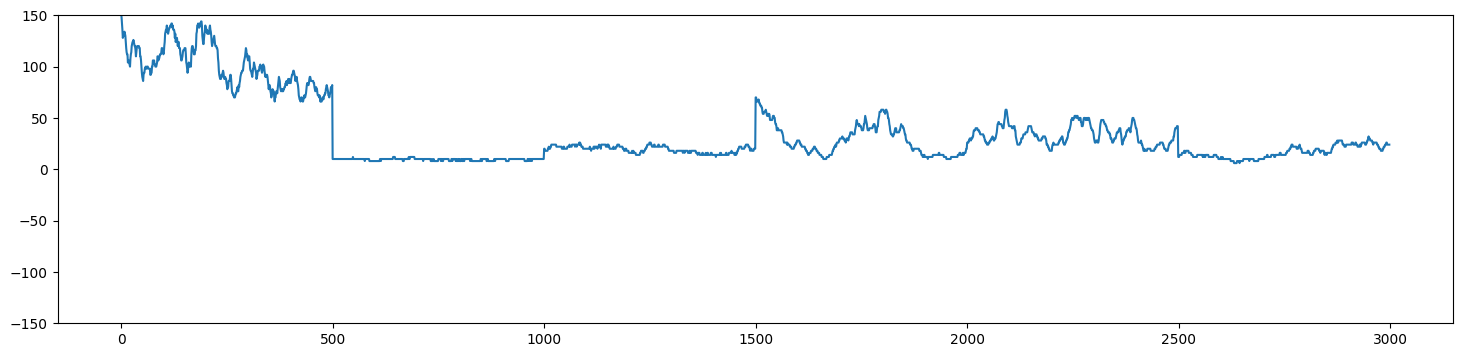

In [4]:
batas1 = 150
plt.rcParams["figure.figsize"] = (18,4)
plt.plot(df_emg[0])
plt.ylim(bottom=-batas1, top=batas1)

## Displays 1 Channel MYO EMG Signal with Envelope EMG

(-150.0, 150.0)

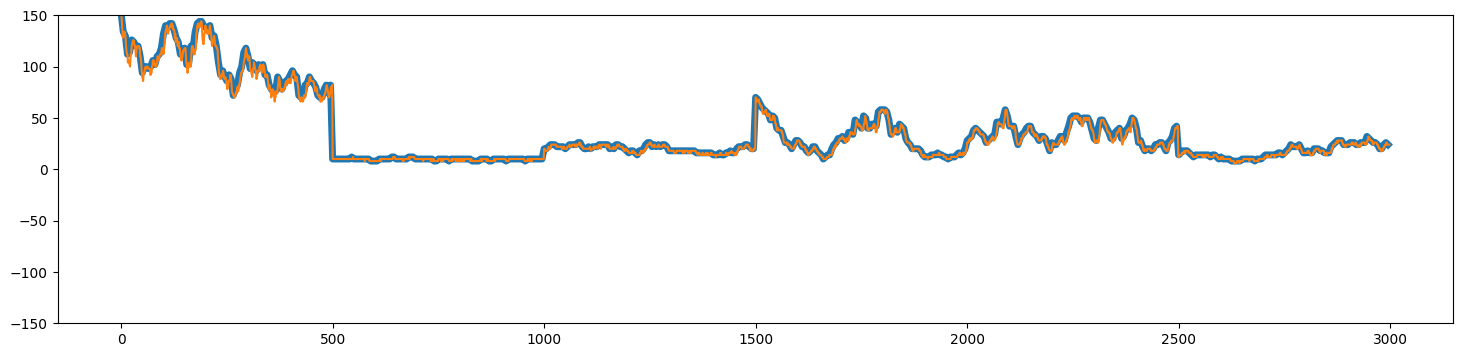

In [5]:
channel_1 = df_emg[0]

window = 5

plt.figure(figsize = (18,4))
plt.plot(range(0, channel_1.size, window), 
         [max(channel_1[a:a+window]) for a in range(0, channel_1.size, window)], lw=5)
plt.plot(channel_1)
plt.ylim(bottom=-batas1, top=batas1)

## Make Keys & Values untuk Dictionary Envelope EMG

In [6]:
x1 = range(0, channel_1.size, window)

keys = []
for a in range(1,6):
    keys.append(f"{a}")

keys

['1', '2', '3', '4', '5']

In [7]:
df_emg.shape[1]

5

In [8]:
values = []
for i in range(0,5):
    channel = df_emg[i]
    y = [max(channel[a:a+window]) for a in range(0, channel.size, window)]
    values.append(y)

# print(values)

In [9]:
dict_envelope = dict(zip(keys, values))
# print(dict_envelope)

## Make DataFrame Envelope EMG

In [10]:
dict_envelope = dict(zip(keys, values))
df_envelope = pd.DataFrame(dict_envelope)

df_envelope.head()

,1,2,3,4,5
0,152,152,150,150,150
1,134,132,134,134,134
2,130,128,128,126,126
3,112,110,110,108,108
4,114,114,116,118,118


## Displays all EMG Envelope channels stacked with Original EMG Signals and smoothment on envelope

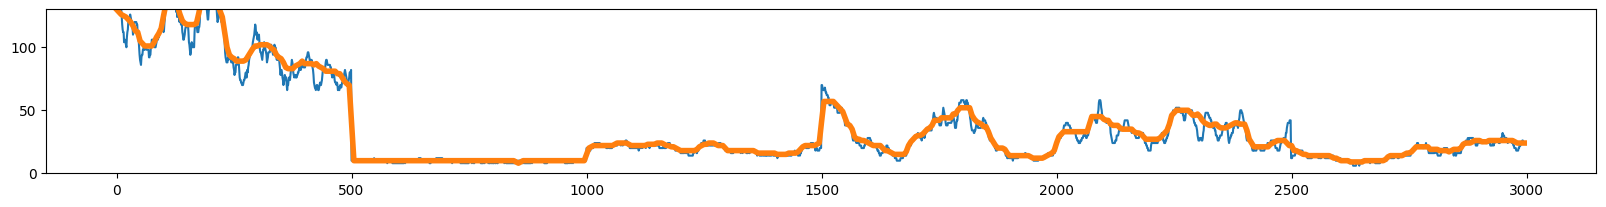

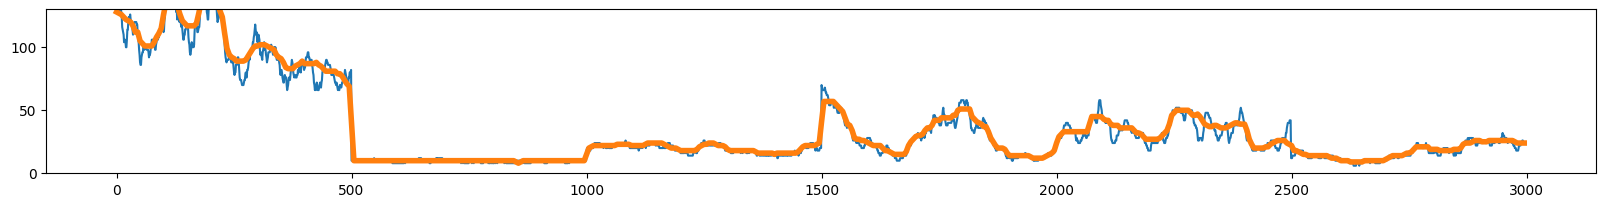

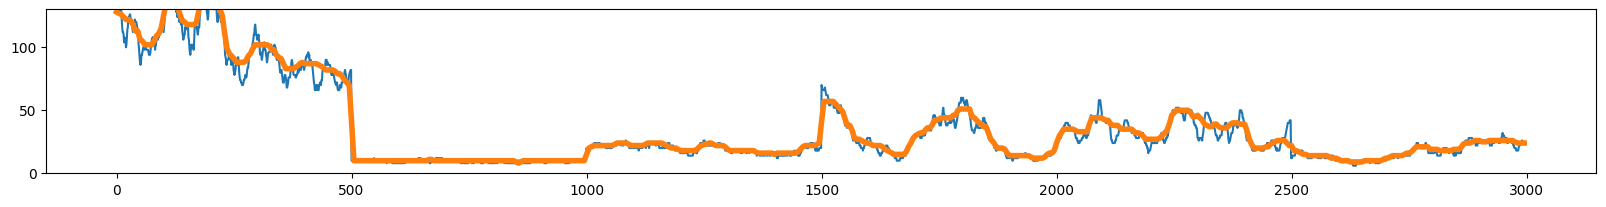

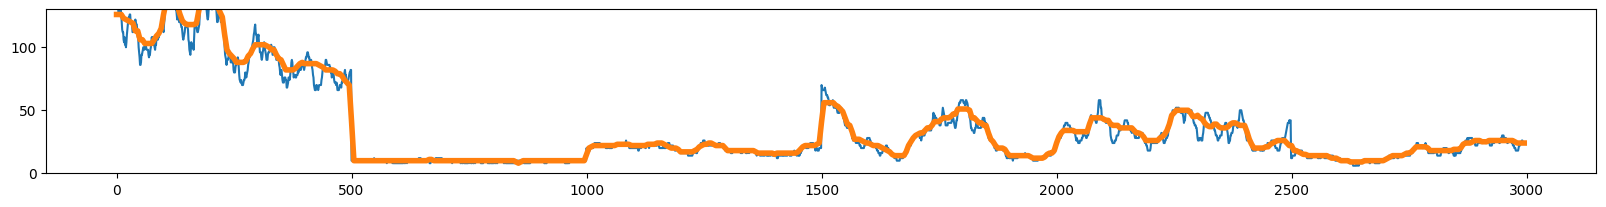

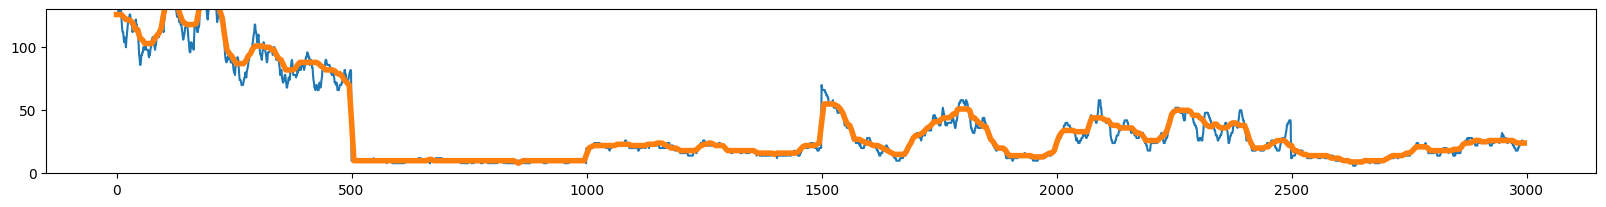

In [11]:
atas = 130
batas_1 = [0, 170, 500, 800, 1100, 1400, 1730, 2168]

for a in range(1,6):
    smotDeriv = df_envelope[f"{a}"].rolling(window=10, min_periods=5, center=True).median()
    shape = f"81{a}"
    
    plt.figure(figsize = (20,20))
    plt.subplot(int(shape))
    plt.plot(df_emg[a-1])
    plt.plot(x1, smotDeriv, lw=4)
    plt.ylim(bottom=0, top=atas)

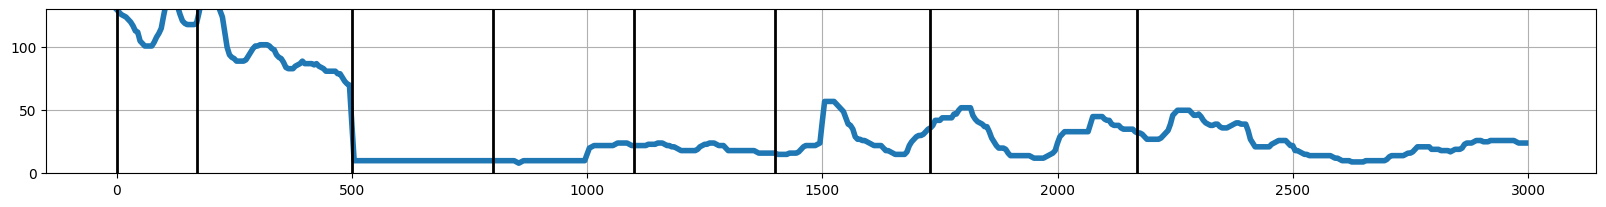

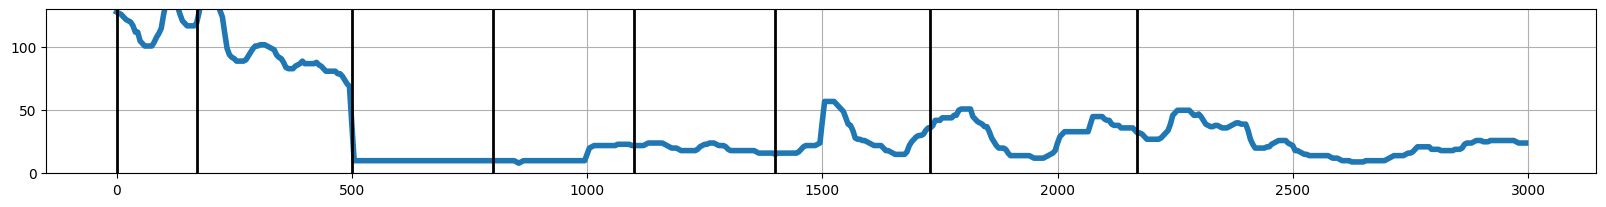

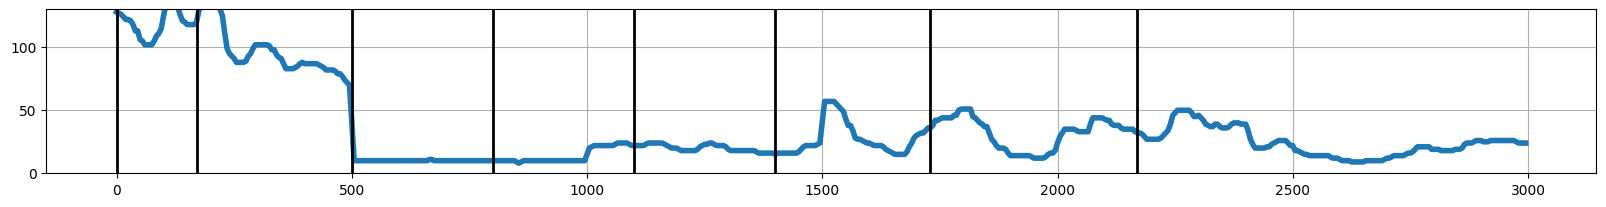

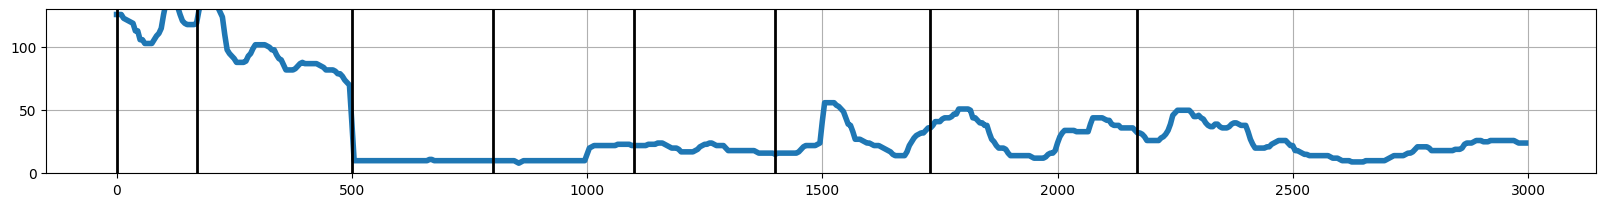

In [13]:
for a in range(1,5):
    smotDeriv = df_envelope[f"{a}"].rolling(window=10, min_periods=5, center=True).median()
    shape = f"81{a}"
    
    plt.figure(figsize = (20,20))
    plt.subplot(int(shape)).grid()
    plt.plot(x1, smotDeriv, lw=4)
    for a in batas_1:
        plt.axvline(a, color="black", lw=2)
    plt.ylim(bottom=0, top=atas)